In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import xgboost
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import scipy.stats as stat
import pylab
!pip install -U imbalanced-learn
!pip install delayed

Requirement already up-to-date: imbalanced-learn in /opt/anaconda3/lib/python3.8/site-packages (0.8.0)


In [93]:
df = pd.read_csv("train.csv")

In [94]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [95]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

#### The IR comes out to be 3.52 which indicates medium imbalance

In [96]:
df.groupby('default.payment.next.month').count()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default.payment.next.month,,,,,,,,,,,,,,,,,,,,,
0,23364,23364,23364,23364,23364,23364,23364,23364,23364,23364,...,23364,23364,23364,23364,23364,23364,23364,23364,23364,23364
1,6636,6636,6636,6636,6636,6636,6636,6636,6636,6636,...,6636,6636,6636,6636,6636,6636,6636,6636,6636,6636


<AxesSubplot:>

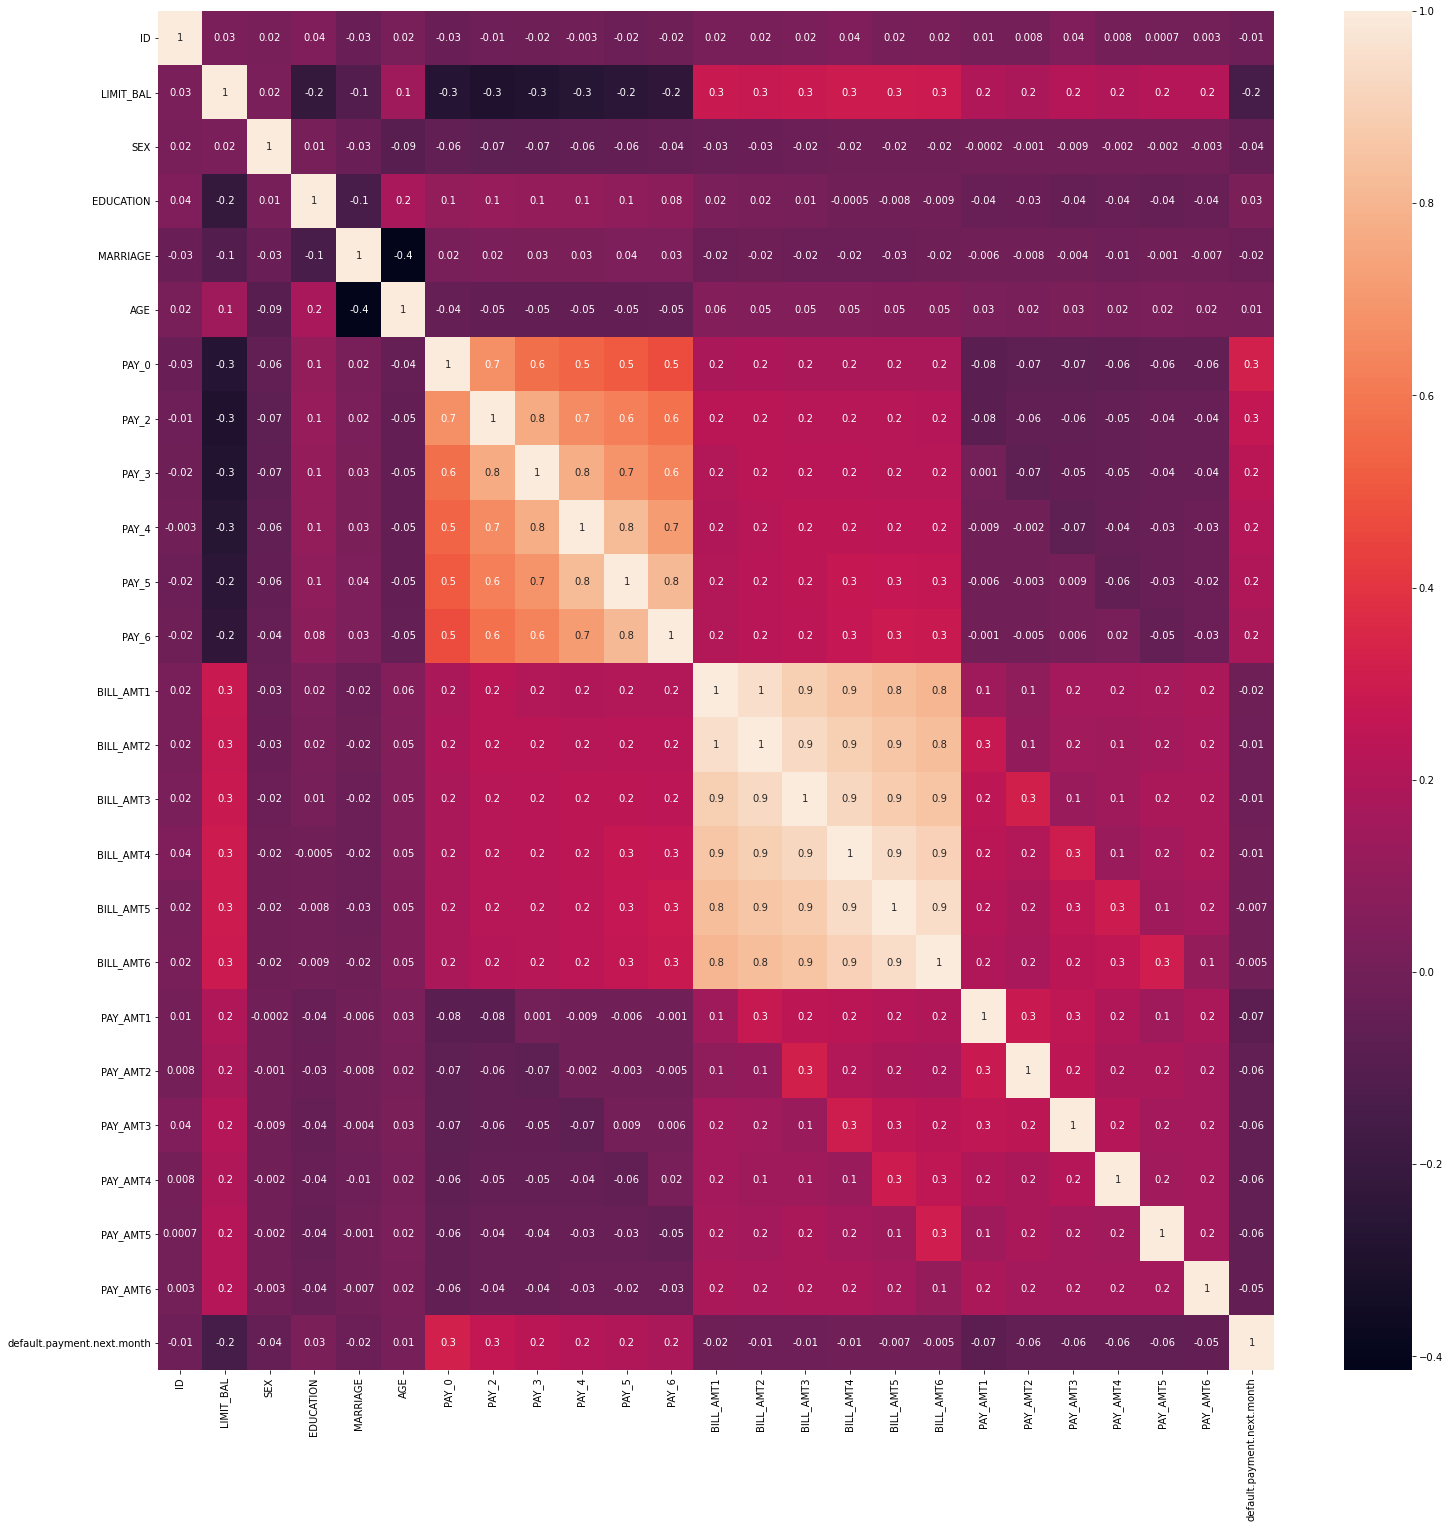

In [97]:
corr = df.corr()
plt.subplots(figsize=(25,25))

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
         annot = True,
           fmt='.1g')

In [98]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [99]:
df['SEX'] = df['SEX'].map({1 : 'male', 2 : 'female'})
df['EDUCATION'] = df['EDUCATION'].map({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others', 5 : 'unknown', 6 : 'unknown2'})
df['MARRIAGE'] = df['MARRIAGE'].map({1 : 'married', 2 : 'single', 3 : 'others'})
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,male,high school,married,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,male,high school,single,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,male,university,single,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,male,high school,married,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [100]:
df.groupby('default.payment.next.month').mean()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default.payment.next.month,,,,,,,,,,,,,,,,,,,,,
0,15064.893982,178099.726074,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,-0.389488,-0.405624,51994.227273,...,47533.365605,43611.165254,40530.445343,39042.268704,6307.337357,6640.465074,5753.496833,5300.529319,5248.220296,5719.371769
1,14773.781947,130109.656420,35.725738,0.668174,0.458258,0.362116,0.254521,0.167872,0.112116,48509.162297,...,45181.598855,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068


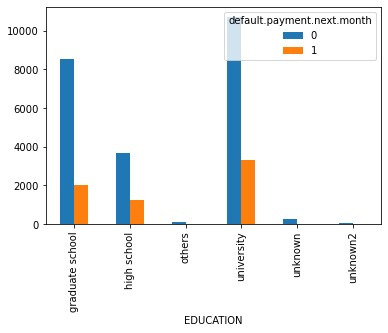

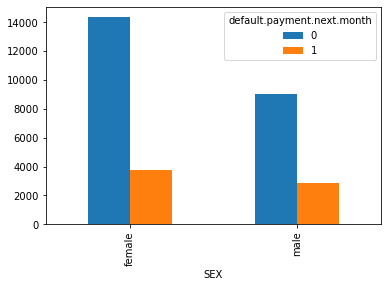

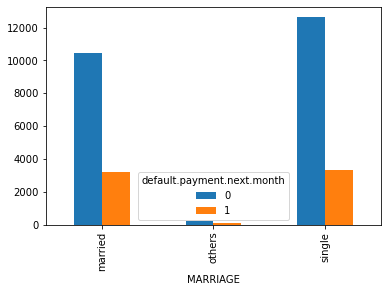

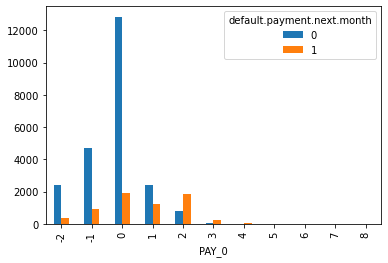

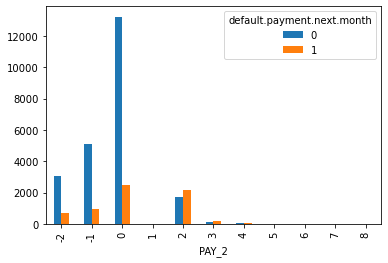

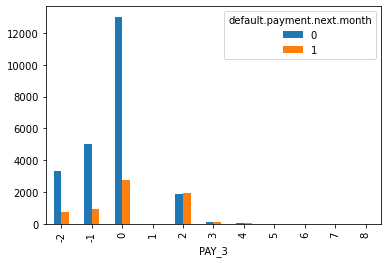

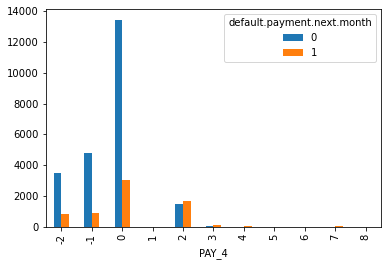

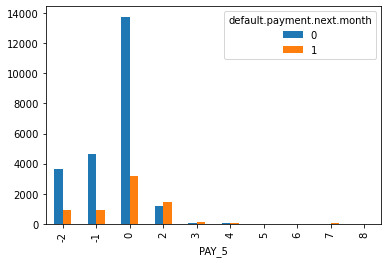

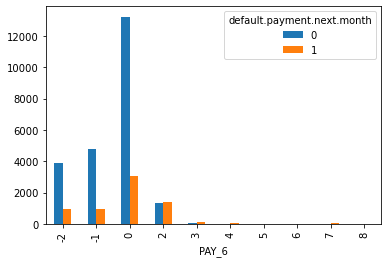

In [101]:
cols = ['EDUCATION','SEX','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
for i in cols:
    pd.crosstab(df[i],df['default.payment.next.month']).plot(kind='bar')

In [102]:
df['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [103]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,male,high school,married,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,male,high school,single,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,male,university,single,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,male,high school,married,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [104]:
df.dropna(inplace=True)

In [105]:
df['Total_Bill'] = df['BILL_AMT1']+df['BILL_AMT2']+df['BILL_AMT3']+df['BILL_AMT4']+df['BILL_AMT5']+df['BILL_AMT6']
df['Total_Pay'] = df['PAY_AMT1']+df['PAY_AMT2']+df['PAY_AMT3']+df['PAY_AMT4']+df['PAY_AMT5']+df['PAY_AMT6']


In [106]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,Total_Bill,Total_Pay
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0,689.0
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0,5000.0
2,3,90000.0,female,university,single,34,0,0,0,0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0,11018.0
3,4,50000.0,female,university,married,37,0,0,0,0,...,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0,8388.0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0,59049.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,male,high school,married,39,0,0,0,0,...,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,725349.0,42550.0
29996,29997,150000.0,male,high school,single,43,-1,-1,-1,-1,...,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,21182.0,14490.0
29997,29998,30000.0,male,university,single,37,4,3,2,-1,...,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,70496.0,31300.0
29998,29999,80000.0,male,high school,married,41,1,-1,0,0,...,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,266611.0,147181.0


In [107]:
df.groupby('default.payment.next.month').median()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Total_Bill,Total_Pay
default.payment.next.month,,,,,,,,,,,,,,,,,,,,,
0,15068,150000.0,34,0,0,0,0,0,0,23236.0,...,18019.0,16709.0,2464.0,2251.0,2000.0,1735.0,1766.0,1709.0,128876.0,16539.0
1,14747,90000.0,34,1,0,0,0,0,0,20186.0,...,18487.0,18023.0,1633.0,1537.0,1220.0,1000.0,1000.0,1000.0,118726.0,9673.0


In [108]:
df1 = df.copy()

In [109]:
cols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
df1.drop(columns = cols, inplace = True)
df1

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month,Total_Bill,Total_Pay
0,1,20000.0,female,university,married,24,2,2,-1,-1,-2,-2,1,7704.0,689.0
1,2,120000.0,female,university,single,26,-1,2,0,0,0,2,1,17077.0,5000.0
2,3,90000.0,female,university,single,34,0,0,0,0,0,0,0,101653.0,11018.0
3,4,50000.0,female,university,married,37,0,0,0,0,0,0,0,231334.0,8388.0
4,5,50000.0,male,university,married,57,-1,0,-1,0,0,0,0,109339.0,59049.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,male,high school,married,39,0,0,0,0,0,0,0,725349.0,42550.0
29996,29997,150000.0,male,high school,single,43,-1,-1,-1,-1,0,0,0,21182.0,14490.0
29997,29998,30000.0,male,university,single,37,4,3,2,-1,0,0,1,70496.0,31300.0
29998,29999,80000.0,male,high school,married,41,1,-1,0,0,0,-1,1,266611.0,147181.0


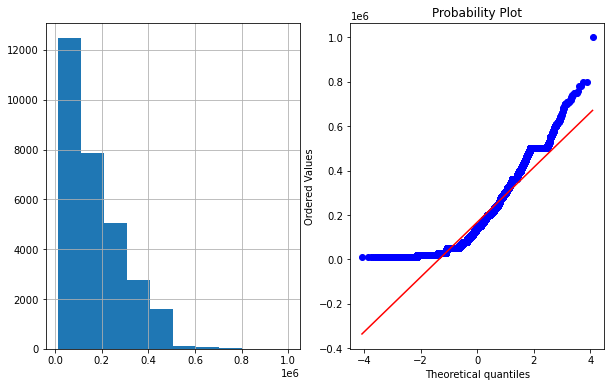

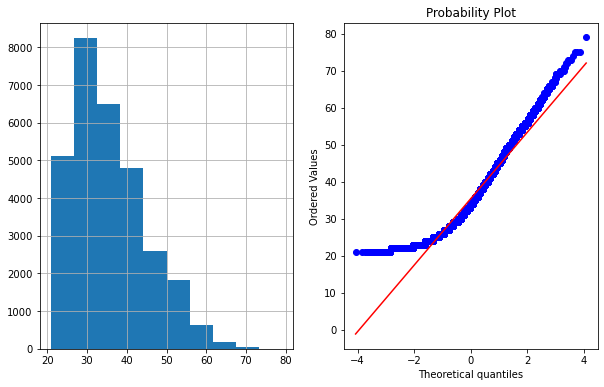

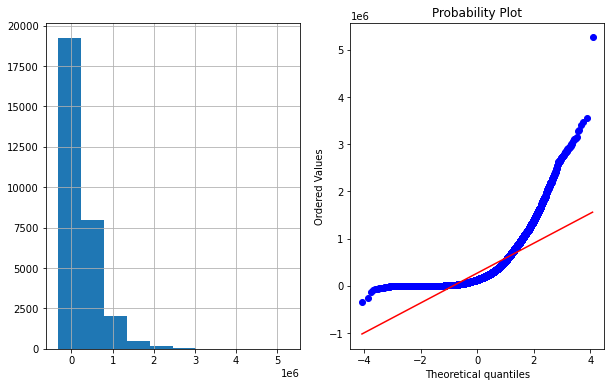

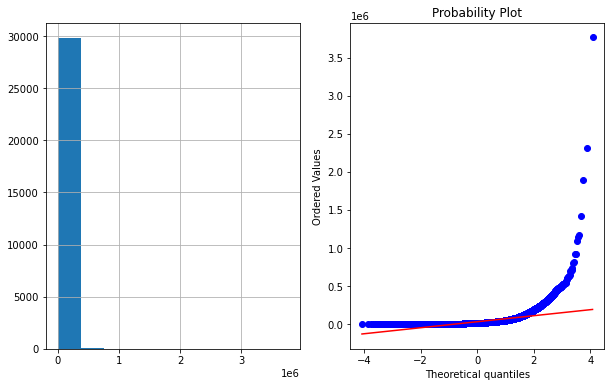

In [110]:
features = ['LIMIT_BAL','AGE','Total_Bill','Total_Pay']
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    
for i in features:
    plot_data(df1,i)

In [111]:
df1['Total_Pay_log'] = np.log1p(df1['Total_Pay'])

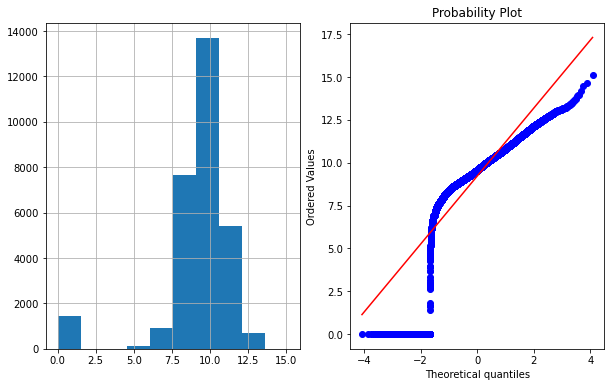

In [112]:
plot_data(df1,'Total_Pay_log')

In [113]:
df1.drop(df1[df1['Total_Bill']<0].index, inplace=True)
df1

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month,Total_Bill,Total_Pay,Total_Pay_log
0,1,20000.0,female,university,married,24,2,2,-1,-1,-2,-2,1,7704.0,689.0,6.536692
1,2,120000.0,female,university,single,26,-1,2,0,0,0,2,1,17077.0,5000.0,8.517393
2,3,90000.0,female,university,single,34,0,0,0,0,0,0,0,101653.0,11018.0,9.307376
3,4,50000.0,female,university,married,37,0,0,0,0,0,0,0,231334.0,8388.0,9.034677
4,5,50000.0,male,university,married,57,-1,0,-1,0,0,0,0,109339.0,59049.0,10.986140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,male,high school,married,39,0,0,0,0,0,0,0,725349.0,42550.0,10.658459
29996,29997,150000.0,male,high school,single,43,-1,-1,-1,-1,0,0,0,21182.0,14490.0,9.581283
29997,29998,30000.0,male,university,single,37,4,3,2,-1,0,0,1,70496.0,31300.0,10.351405
29998,29999,80000.0,male,high school,married,41,1,-1,0,0,0,-1,1,266611.0,147181.0,11.899425


#### Necessary transformation to make columns normally distributed

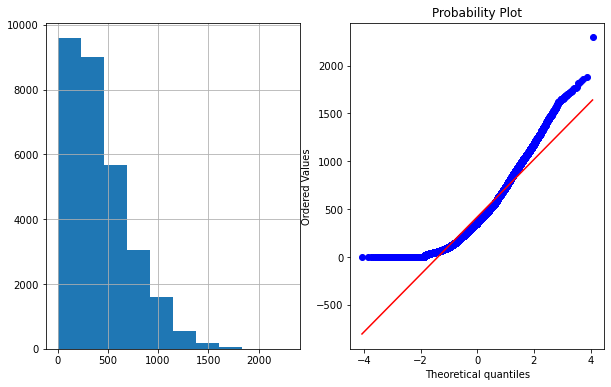

In [114]:
df1['Total_bill_log'] = df1.Total_Bill**(1/2)
plot_data(df1,'Total_bill_log')

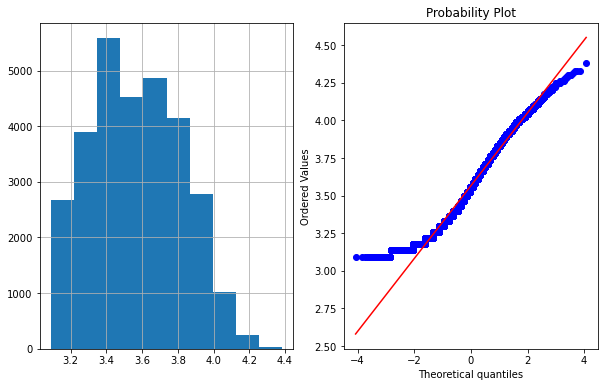

In [115]:
df1['AGE_log'] = np.log1p(df1['AGE'])
plot_data(df1,'AGE_log')

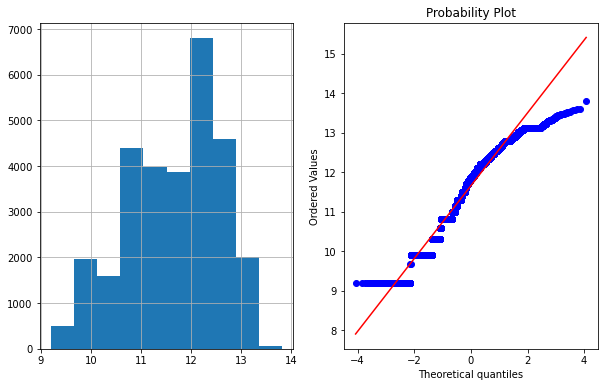

In [116]:
df1['LIMIT_BAL_log'] = np.log1p(df1['LIMIT_BAL'])
plot_data(df1,'LIMIT_BAL_log')

In [117]:
df1.skew()

ID                             0.001837
LIMIT_BAL                      0.996768
AGE                            0.732483
PAY_0                          0.745790
PAY_2                          0.797949
PAY_3                          0.849154
PAY_4                          1.011286
PAY_5                          1.019634
PAY_6                          0.955924
default.payment.next.month     1.342681
Total_Bill                     2.725886
Total_Pay                     14.644868
Total_Pay_log                 -2.691599
Total_bill_log                 0.990641
AGE_log                        0.256446
LIMIT_BAL_log                 -0.509500
dtype: float64

In [118]:
cols = ['SEX','EDUCATION','MARRIAGE']
for i in cols:
        dummies = pd.get_dummies(df1[i],drop_first=True)
        df1.drop([i],axis=1,inplace=True)
        df1=pd.concat([df1,dummies],axis=1)

In [119]:
df1

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month,...,AGE_log,LIMIT_BAL_log,male,high school,others,university,unknown,unknown2,others,single
0,1,20000.0,24,2,2,-1,-1,-2,-2,1,...,3.218876,9.903538,0,0,0,1,0,0,0,0
1,2,120000.0,26,-1,2,0,0,0,2,1,...,3.295837,11.695255,0,0,0,1,0,0,0,1
2,3,90000.0,34,0,0,0,0,0,0,0,...,3.555348,11.407576,0,0,0,1,0,0,0,1
3,4,50000.0,37,0,0,0,0,0,0,0,...,3.637586,10.819798,0,0,0,1,0,0,0,0
4,5,50000.0,57,-1,0,-1,0,0,0,0,...,4.060443,10.819798,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,39,0,0,0,0,0,0,0,...,3.688879,12.301387,1,1,0,0,0,0,0,0
29996,29997,150000.0,43,-1,-1,-1,-1,0,0,0,...,3.784190,11.918397,1,1,0,0,0,0,0,1
29997,29998,30000.0,37,4,3,2,-1,0,0,1,...,3.637586,10.308986,1,0,0,1,0,0,0,1
29998,29999,80000.0,41,1,-1,0,0,0,-1,1,...,3.737670,11.289794,1,1,0,0,0,0,0,0


#### Scaling Dataset Using StandardScaler()

In [120]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
col_names = ['Total_Pay_log','Total_bill_log','AGE_log','LIMIT_BAL_log']
features = df1[col_names]
ct = ColumnTransformer([
        ('scaler', StandardScaler(), ['Total_Pay_log','Total_bill_log','AGE_log','LIMIT_BAL_log'])
    ], remainder='passthrough')
ct.fit_transform(features)
df1.drop(columns = col_names, inplace=True)
df_scaled = pd.DataFrame(ct.fit_transform(features),columns = col_names)
df_scaled1 = pd.concat([df1,df_scaled], axis=1)
df_scaled1


,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month,...,others,university,unknown,unknown2,others,single,Total_Pay_log,Total_bill_log,AGE_log,LIMIT_BAL_log
0,1.0,20000.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,-1.161969,-1.063110,-1.419791,-1.866937
1,2.0,120000.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,-0.314083,-0.925250,-1.105193,0.036051
2,3.0,90000.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.024088,-0.320711,-0.044376,-0.269494
3,4.0,50000.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.092647,0.200256,0.291793,-0.893774
4,5.0,50000.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.742722,-0.282688,2.020328,-0.893774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996.0,220000.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
29996,29997.0,150000.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN
29997,29998.0,30000.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN
29998,29999.0,80000.0,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [121]:
df_scaled1.isna().sum()

ID                            268
LIMIT_BAL                     268
AGE                           268
PAY_0                         268
PAY_2                         268
PAY_3                         268
PAY_4                         268
PAY_5                         268
PAY_6                         268
default.payment.next.month    268
Total_Bill                    268
Total_Pay                     268
male                          268
high school                   268
others                        268
university                    268
unknown                       268
unknown2                      268
others                        268
single                        268
Total_Pay_log                 268
Total_bill_log                268
AGE_log                       268
LIMIT_BAL_log                 268
dtype: int64

In [122]:
df_scaled1.dropna(inplace=True)
df1 = df_scaled1.copy()
df1

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month,...,others,university,unknown,unknown2,others,single,Total_Pay_log,Total_bill_log,AGE_log,LIMIT_BAL_log
0,1.0,20000.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,-1.161969,-1.063110,-1.419791,-1.866937
1,2.0,120000.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,-0.314083,-0.925250,-1.105193,0.036051
2,3.0,90000.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.024088,-0.320711,-0.044376,-0.269494
3,4.0,50000.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.092647,0.200256,0.291793,-0.893774
4,5.0,50000.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.742722,-0.282688,2.020328,-0.893774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29726,29727.0,60000.0,36.0,3.0,2.0,2.0,7.0,7.0,6.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.602451,1.391338,0.501468,0.679825
29727,29728.0,200000.0,34.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.141340,-0.877500,0.891072,0.273050
29728,29729.0,160000.0,46.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.471009,-0.492030,0.291793,-1.436309
29729,29730.0,360000.0,35.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.133676,0.313907,0.700910,-0.394590


In [123]:
df1 = df1.loc[:,~df1.columns.duplicated()]
df1

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month,...,high school,others,university,unknown,unknown2,single,Total_Pay_log,Total_bill_log,AGE_log,LIMIT_BAL_log
0,1.0,20000.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-1.161969,-1.063110,-1.419791,-1.866937
1,2.0,120000.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-0.314083,-0.925250,-1.105193,0.036051
2,3.0,90000.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.024088,-0.320711,-0.044376,-0.269494
3,4.0,50000.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-0.092647,0.200256,0.291793,-0.893774
4,5.0,50000.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.742722,-0.282688,2.020328,-0.893774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29726,29727.0,60000.0,36.0,3.0,2.0,2.0,7.0,7.0,6.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.602451,1.391338,0.501468,0.679825
29727,29728.0,200000.0,34.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.141340,-0.877500,0.891072,0.273050
29728,29729.0,160000.0,46.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.471009,-0.492030,0.291793,-1.436309
29729,29730.0,360000.0,35.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.133676,0.313907,0.700910,-0.394590


In [124]:
y = df1['default.payment.next.month']


In [125]:
cols = ['ID','default.payment.next.month','AGE','Total_Bill','Total_Pay','LIMIT_BAL']
X = df1.drop(columns = cols)
X

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,male,high school,others,university,unknown,unknown2,single,Total_Pay_log,Total_bill_log,AGE_log,LIMIT_BAL_log
0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.161969,-1.063110,-1.419791,-1.866937
1,-1.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.314083,-0.925250,-1.105193,0.036051
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.024088,-0.320711,-0.044376,-0.269494
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.092647,0.200256,0.291793,-0.893774
4,-1.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.742722,-0.282688,2.020328,-0.893774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29726,3.0,2.0,2.0,7.0,7.0,6.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.602451,1.391338,0.501468,0.679825
29727,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.141340,-0.877500,0.891072,0.273050
29728,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.471009,-0.492030,0.291793,-1.436309
29729,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.133676,0.313907,0.700910,-0.394590


#### Adding more samples of default.payment.next.month = 1 so that dataset becomes balance

In [126]:
def makeOverSamplesADASYN(X,y):
    from imblearn.over_sampling import ADASYN 
    sm = ADASYN()
    print(X,y)
    X, y = sm.fit_resample(X, y)
    print(X,y)
    return(X,y)

X,y = makeOverSamplesADASYN(X,y)

       PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  male  high school  others  \
0        2.0    2.0   -1.0   -1.0   -2.0   -2.0   0.0          0.0     0.0   
1       -1.0    2.0    0.0    0.0    0.0    2.0   0.0          0.0     0.0   
2        0.0    0.0    0.0    0.0    0.0    0.0   0.0          0.0     0.0   
3        0.0    0.0    0.0    0.0    0.0    0.0   0.0          0.0     0.0   
4       -1.0    0.0   -1.0    0.0    0.0    0.0   1.0          0.0     0.0   
...      ...    ...    ...    ...    ...    ...   ...          ...     ...   
29726    3.0    2.0    2.0    7.0    7.0    6.0   1.0          0.0     0.0   
29727   -2.0   -2.0   -2.0   -2.0   -2.0   -2.0   1.0          0.0     0.0   
29728   -2.0   -2.0   -2.0   -2.0   -2.0   -2.0   1.0          0.0     0.0   
29729   -1.0   -1.0   -1.0   -1.0   -1.0   -2.0   1.0          0.0     0.0   
29730    0.0    0.0    0.0    0.0    0.0    0.0   1.0          0.0     0.0   

       university  unknown  unknown2  single  Total_Pay_log  To

In [127]:
X

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,male,high school,others,university,unknown,unknown2,single,Total_Pay_log,Total_bill_log,AGE_log,LIMIT_BAL_log
0,2.0,2.0,-1.0,-1.0,-2.0,-2.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,-1.161969,-1.063110,-1.419791,-1.866937
1,-1.0,2.0,0.0,0.0,0.0,2.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,-0.314083,-0.925250,-1.105193,0.036051
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.024088,-0.320711,-0.044376,-0.269494
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,-0.092647,0.200256,0.291793,-0.893774
4,-1.0,0.0,-1.0,0.0,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.742722,-0.282688,2.020328,-0.893774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45488,0.0,0.0,0.0,0.0,0.0,-0.721231,1.0,1.0,0.0,0.0,0.0,0.0,0.721231,-3.960154,-1.235941,0.218981,1.070232
45489,-2.0,-2.0,-2.0,-2.0,-2.0,-2.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.379893,-0.637958,-0.667314,-1.767168
45490,-2.0,-2.0,-2.0,-2.0,-2.0,-2.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.426790,-0.562849,-0.173667,-1.596877
45491,-2.0,-2.0,-2.0,-2.0,-2.0,-2.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.528828,0.413268,-0.383917,0.114018,-1.664037


In [132]:

unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[0.0000e+00 1.0000e+00]
 [2.2954e+04 2.2539e+04]]


In [129]:
def predict(ml_model):
    import sklearn.metrics as metrics
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    print('Testing score : {}'.format(model.score(X_test,y_test)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test,model.predict(X_test))
    plt.figure(figsize = (15,10))
    sns.heatmap(cm, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    print(metrics.classification_report(y_test, y_prediction))

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Training score : 0.606971267074894
Testing score : 0.6023593200468933
predictions are: 
 [1. 1. 1. ... 1. 0. 0.]


r2 score: -0.590651565708763
MAE: 0.3976406799531067
MSE: 0.3976406799531067
RMSE: 0.6305875672363884
              precision    recall  f1-score   support

         0.0       0.60      0.65      0.62      6875
         1.0       0.61      0.56      0.58      6773

    accuracy                           0.60     13648
   macro avg       0.60      0.60      0.60     13648
weighted avg       0.60      0.60      0.60     13648

Training score : 1.0
Testing score : 0.8606389214536928
predictions are: 
 [0. 1. 0. ... 1. 1. 0.]


r2 score: 0.4425245480047785
MAE: 0.13936107854630714
MSE: 0.13936107854630714
RMSE: 0.37331096762124083
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86      6875
         1.0       0.88      0.84      0.86      6773

    accuracy                           0.86     13648
   macro avg       0.86      0.8

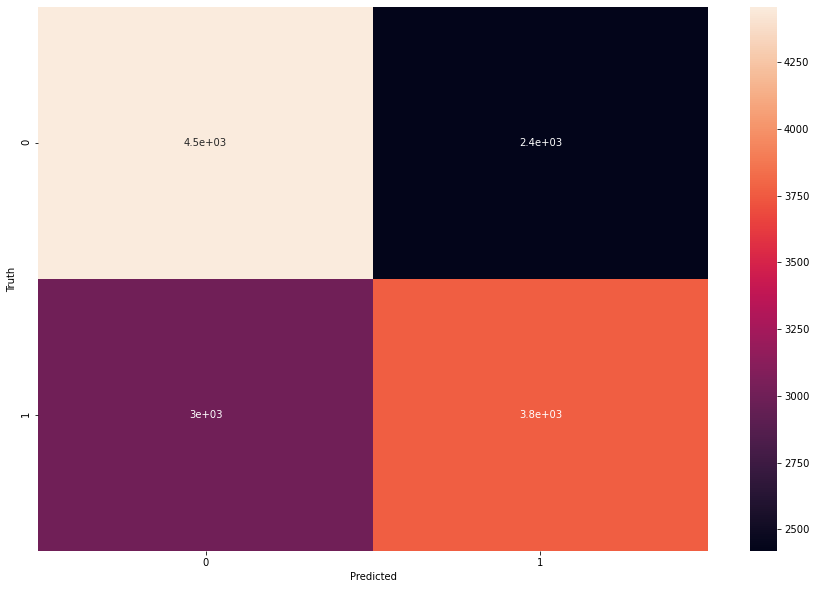

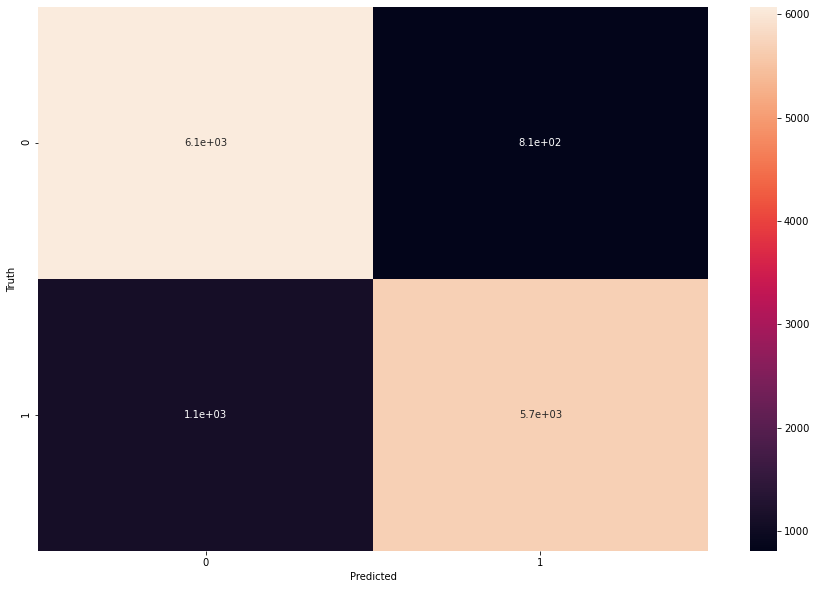

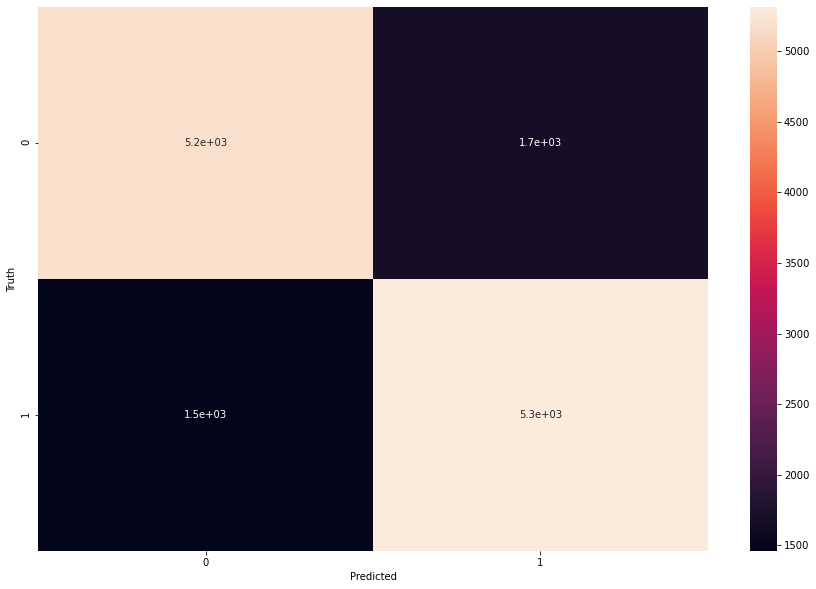

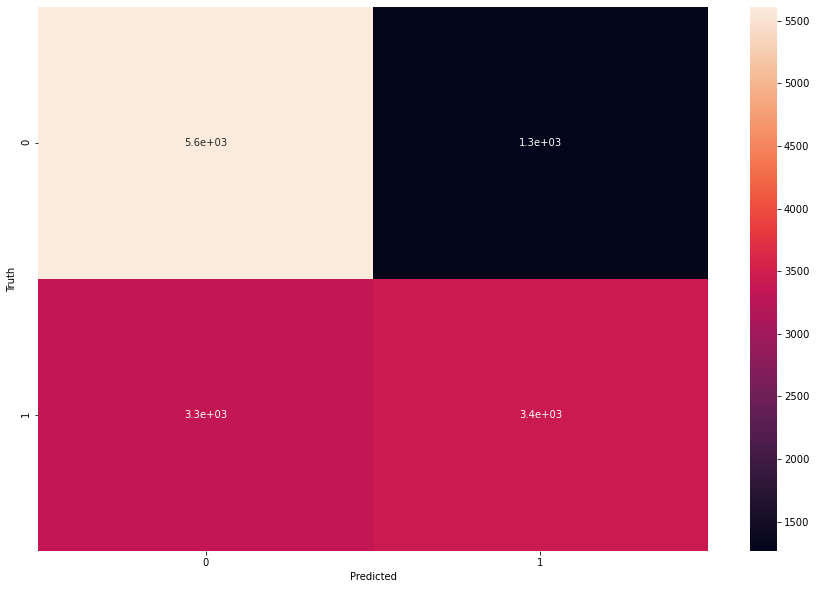

In [140]:
models = [LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(),svm.SVC()]

for i in models:
    predict(i)